# ИДЗ 2 (вариант 13)
## Ноздрин В.Я. гр. 9383

In [3]:
library("IRdisplay")
library("maxLik")

## Задание 1  

### a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.  

**Таблица 1** $\alpha_1=0.10;\quad a=3.90;\quad b=10.48;\quad\lambda_0=4.00;\quad\lambda_1=8.00$  
$6,\ 0,\ 4,\ 4,\ 4,\ 1,\ 10,\ 9,\ 10,\ 7,$  
$2,\ 3,\ 14,\ 23,\ 2,\ 0,\ 0,\ 4,\ 2,\ 18,$  
$7,\ 6,\ 8,\ 7,\ 0,\ 1,\ 27,\ 2,\ 5,\ 0,$  
$2,\ 4,\ 7,\ 4,\ 1,\ 12,\ 3,\ 2,\ 3,\ 0,$  
$7,\ 0,\ 0,\ 1,\ 0,\ 2,\ 2,\ 1,\ 4,\ 16$  

[1]  0  0  0  0  0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  2  2  3  3  3
[26]  4  4  4  4  4  4  4  5  6  6  7  7  7  7  7  8  9 10 10 12 14 16 18 23 27

table1
 0  1  2  3  4  5  6  7  8  9 10 12 14 16 18 23 27 
 9  5  8  3  7  1  2  5  1  1  2  1  1  1  1  1  1 

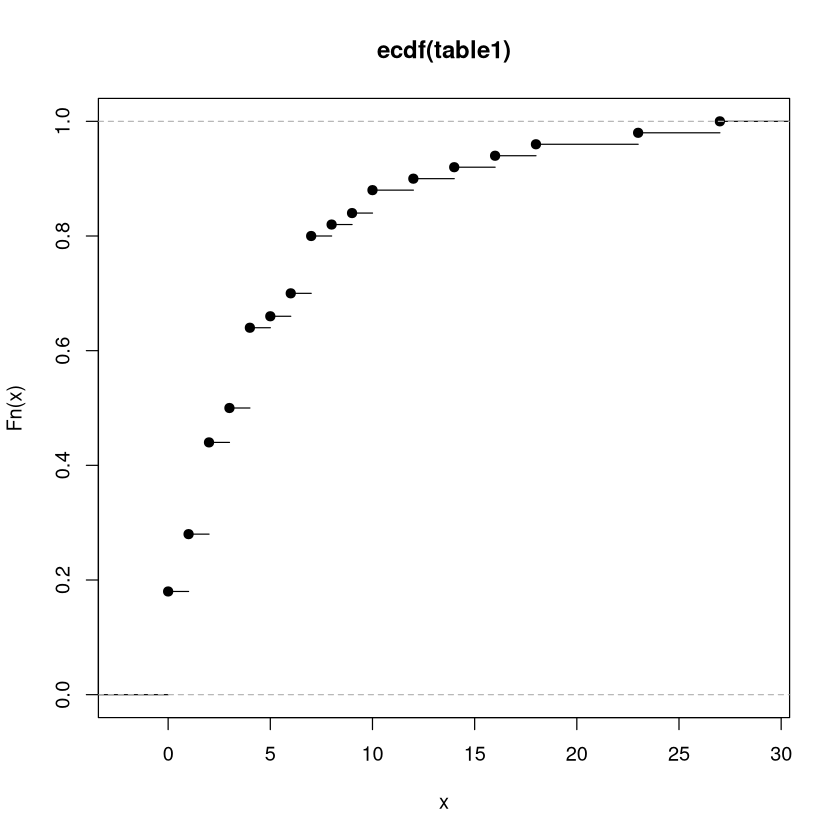

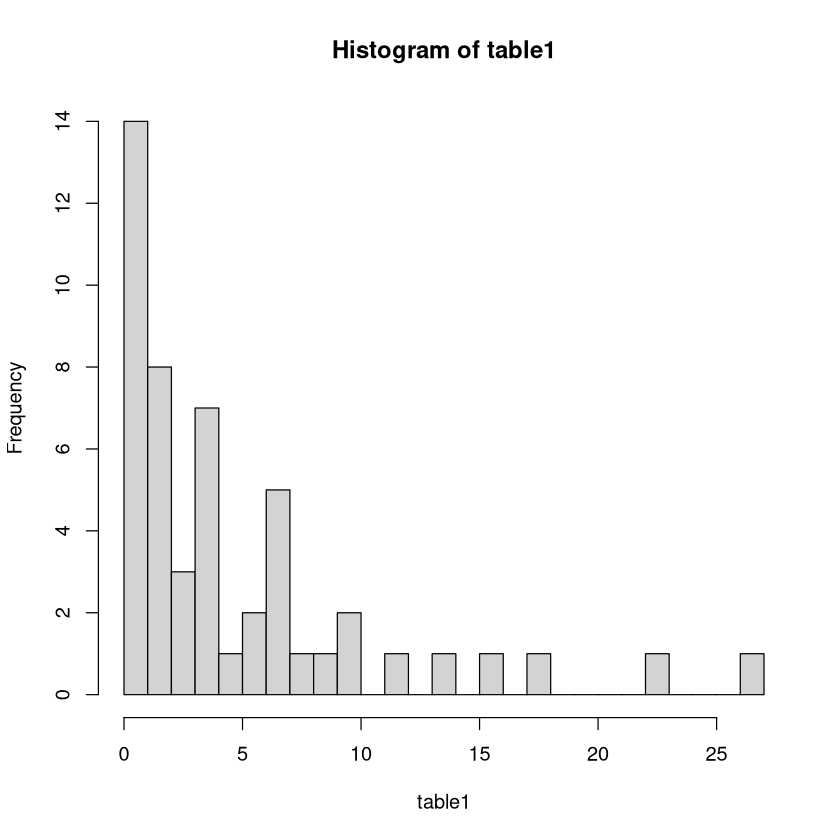

In [15]:
alpha1 = 0.10
a = 3.90
b = 10.48
lambda0 = 4.00
lambda1 = 5.00
table1 = c(
    6,  0,  4,  4,  4,  1, 10,  9, 10,  7,
    2,  3, 14, 23,  2,  0,  0,  4,  2, 18,
    7,  6,  8,  7,  0,  1, 27,  2,  5,  0,
    2,  4,  7,  4,  1, 12,  3,  2,  3,  0,
    7,  0,  0,  1,  0,  2,  2,  1,  4, 16
)
len = length(table1)
sort(table1)
table(table1)
plot(ecdf(table1))
histogram = hist(table1, breaks=seq(min(table1), max(table1), by=1.0))

$F(x) = \left\{
\begin{matrix}
    0              , x < 0        \\
    \frac{9}{50}   , x \in [0, 1) \\
    \frac{14}{50}  , x \in [1, 2) \\
    \frac{22}{50}  , x \in [2, 3) \\
    \frac{25}{50}  , x \in [3, 4) \\
    \frac{32}{50}  , x \in [4, 5) \\
    \frac{33}{50}  , x \in [5, 6) \\
    \frac{35}{50}  , x \in [6, 7) \\
    \frac{40}{50}  , x \in [7, 8) \\
    \frac{41}{50}  , x \in [8, 9) \\
    \frac{42}{50}  , x \in [9, 10) \\
    \frac{44}{50}  , x \in [10, 12) \\
    \frac{45}{50}  , x \in [12, 14) \\
    \frac{46}{50}  , x \in [14, 16) \\
    \frac{47}{50}  , x \in [16, 18) \\
    \frac{48}{50}  , x \in [18, 23) \\
    \frac{49}{50}  , x \in [23, 27) \\
    1              , x \geq 27
\end{matrix}\right.$

## Задание 1  

### b) Вычислить выборочные аналоги следующих числовых характеристик:

(i) мат.ожидания (ii) дисперсии (iii) медианы (iv) асимметрии (v) эксцесса (vi) вероятности $P(X\in[a,b])$

#### Математическое ожидание

$$\bar X=\frac{1}{n}\sum_{i=1}^{n}X_i$$

#### Дисперсия

$$D^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar x)$$

#### Асимметрия

$$A_s=\frac{E[(X-EX)^3]}{[\sqrt{D[x]}]^3}$$

#### Эксцесс

$$\gamma_2 = \frac {E[(X - EX)^4]}{[\sqrt{D[x]}]^4} - 3$$

#### Вероятность $P(X\in[a, b])$

$P(X\in[3.90,10.48])=F(10.48)-F(3.90)=\frac{44}{50}-\frac{25}{50}=\frac{19}{50}=0.38$

In [16]:
tableMean = mean(table1)
tableVar = var(table1)
tableMedian = median(table1)
tableAsymetry = (mean((table1-tableMean)^3))/(sqrt(tableVar)^3)
tableExcess = (mean((table1-tableMean)^4))/(sqrt(tableVar)^4) - 3 
probability_ab = ecdf(table1)(10.48)-ecdf(table1)(3.9)

cat("Мат.ожидание:", tableMean, "\t\tДисперсия:", tableVar, "\t\tМедиана:", tableMedian,
    "\nАсимметрия:", tableAsymetry, "\t\tЭксцесс:", tableExcess,
    "\n\nВероятность, что X принадлежит [a,b]:", probability_ab
)

Мат.ожидание: 5.14 		Дисперсия: 35.10245 		Медиана: 3.5 
Асимметрия: 1.831823 		Эксцесс: 3.327046 

Вероятность, что X принадлежит [a,b]: 0.38

### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

In [17]:
LL<-function(t){
    sum(dpois(table1 ,t[1],log=TRUE))
}
ml<-maxNR(LL,start=c(1))
ml$estimate
mean(table1)

[1] 5.14

[1] 5.14

Оценка несмещенная

### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

In [18]:
quantile(table1, probs=seq(0, 1, 0.1))

cat("Выборочное среднее:", mean(table1), "\t\tКорень:", sqrt(mean(table1)*(mean(table1)+1)/length(table1)),
    "\nКвантиль с alpha1=0.1", 0,        "\t\tКорень умножить на квантиль:", 0,
    "\nЛевая граница:", mean(table1),  "\t\t\tПравая граница:", mean(table1)
)

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
 0.0  0.0  1.0  2.0  2.0  3.5  4.0  6.3  7.2 12.2 27.0

Выборочное среднее: 5.14 		Корень: 0.7944759 
Квантиль с alpha1=0.1 0 		Корень умножить на квантиль: 0 
Левая граница: 5.14 			Правая граница: 5.14